# Naive Imlementation of K-Means Clustering

**The K-means algorithm which i used:**
1. Make `k` random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Update centroids based on the above-assigned data samples.
4. Repeat steps `2` and `3` until convergence.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from copy import deepcopy

In [13]:
# Use iris dataset
iris = datasets.load_iris()

# load iris data
data = iris.data

In [14]:
x = data[:,0]
y = data[:,1]

In [15]:
# Combining x and y into one.
data_set = np.array(list(zip(x, y)))

In [16]:
# Number of clusters
k = 3

# x and y coordinates of centroids
centroids_x = np.random.uniform(min(x), max(x), size=k)
centroids_y = np.random.uniform(min(y), max(y), size=k)

#Combining both into one variable
centroids = np.array(list(zip(centroids_x, centroids_y)))

In [18]:
# function to calculate distance btw two points
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one + two) ** 0.5
    return distance

In [22]:
# To store the value of centroids when it updates
centroids_old = np.zeros(centroids.shape)

# Cluster labeles (either 0, 1, or 2)
labels = np.zeros(len(data))
distances = np.zeros(3)

# Initialize error
error = np.zeros(3)
error[0] = distance(centroids[0], centroids_old[0])
error[1] = distance(centroids[1], centroids_old[1])
error[2] = distance(centroids[2], centroids_old[2])

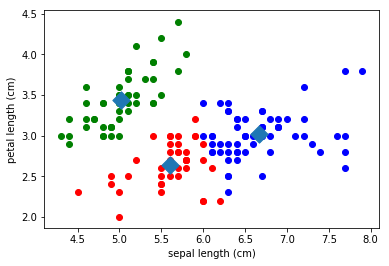

In [24]:
while error.all() != 0:
    # Assign samples to nearest centroids
    for i in range(len(data)):
        distances[0] = distance(data_set[i], centroids[0])
        distances[1] = distance(data_set[i], centroids[1])
        distances[2] = distance(data_set[i], centroids[2])
        cluster = np.argmin(distances)
        labels[i] = cluster
    
    # Update centroids
    centroids_old = deepcopy(centroids)
    for i in range(3):
        points = [data_set[j] for j in range(len(data_set)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    
    # Calculate error
    error[0] = distance(centroids[0], centroids_old[0])
    error[1] = distance(centroids[1], centroids_old[1])
    error[2] = distance(centroids[2], centroids_old[2])

# Visualize data
colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([data_set[j] for j in range(len(data)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i])

# Visualize Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()
